In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme = 'monokai', context ='notebook', ticks=True, grid=False)

In [5]:
tweets_df = pd.read_csv('twitter.csv')

In [6]:
tweets_df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [7]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [8]:
tweets_df.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [9]:
tweets_df = tweets_df.drop(columns='id')

In [10]:
tweets_df.isnull()

,label,tweet
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
31957,False,False
31958,False,False
31959,False,False
31960,False,False


<AxesSubplot:>

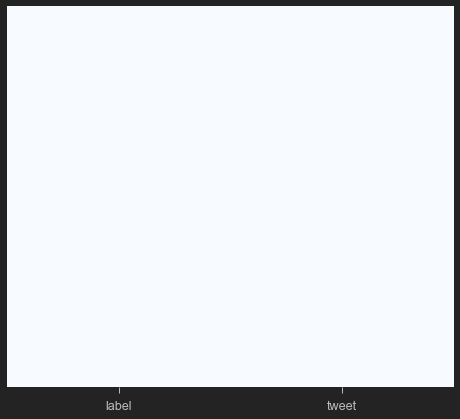

In [11]:
sns.heatmap(tweets_df.isnull(), yticklabels = False, cbar = False, cmap ='Blues')

<AxesSubplot:xlabel='label', ylabel='count'>

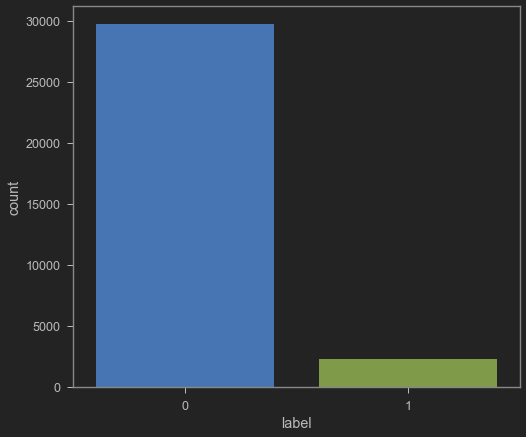

In [12]:
sns.countplot(x = 'label', data =tweets_df)

In [13]:
positive = tweets_df[tweets_df['label']==0]
negative = tweets_df[tweets_df['label']==1]

In [14]:
sentences = tweets_df['tweet'].tolist()
sentences_combined = ' '.join(sentences)

In [15]:
!pip install WordCloud
from wordcloud import WordCloud

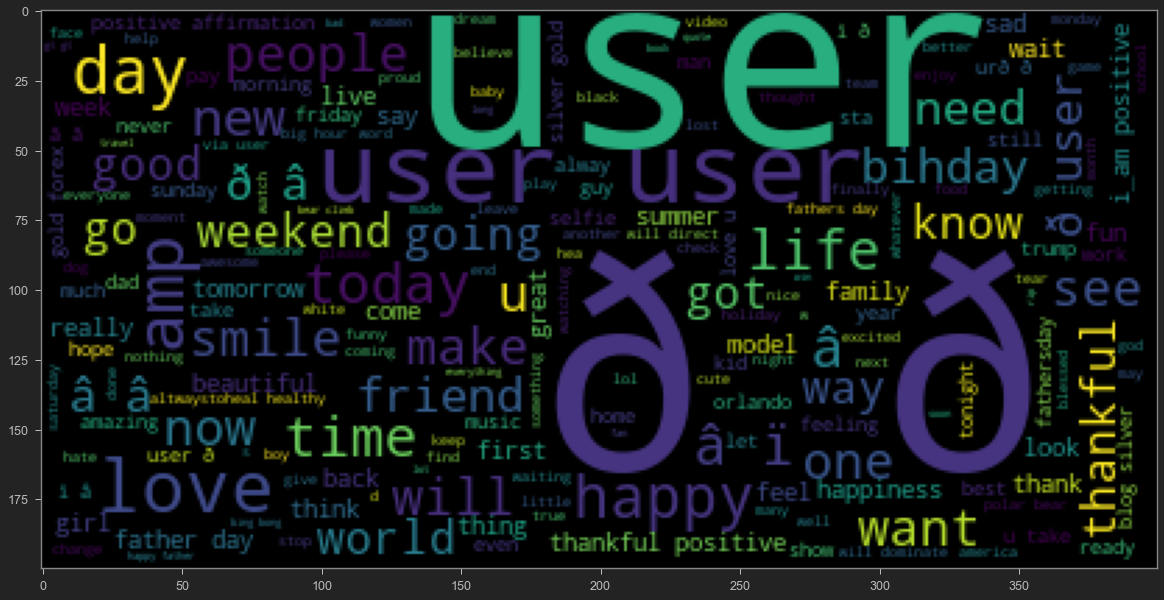

In [16]:
plt.figure(figsize =(20,20))
plt.imshow(WordCloud().generate(sentences_combined))

In [17]:
import string
string.punctuation

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aonim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [18]:
def data_cleanup(message):
    data_punc_removed = [char  for char in message if char not in string.punctuation]
    data_punc_removed_join = ''.join(data_punc_removed)
    data_punc_removed_clean = [word  for word in data_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return data_punc_removed_clean

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer =data_cleanup , dtype = 'uint8')
tweets_countvectorizer= vectorizer.fit_transform(tweets_df['tweet'])

In [20]:
tweets_countvectorizer.shape

(31962, 47386)

In [21]:
X = tweets_countvectorizer
Y = tweets_df['label']

In [22]:
print(X.shape)
print(Y.shape)

(31962, 47386)
(31962,)


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2)

In [24]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, Y_train)

MultinomialNB()

<AxesSubplot:>

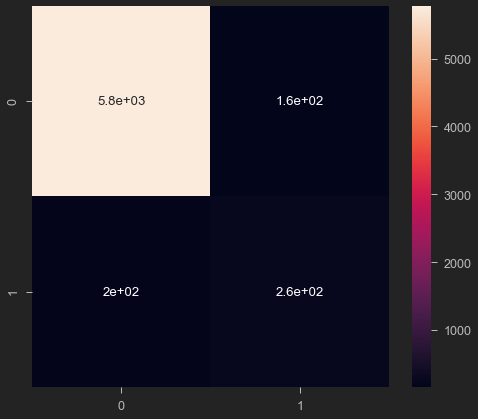

In [25]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(Y_test, y_predict_test)
sns.heatmap(cm, annot = True)

In [26]:
print(classification_report(Y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5933
           1       0.61      0.56      0.58       460

    accuracy                           0.94      6393
   macro avg       0.79      0.77      0.78      6393
weighted avg       0.94      0.94      0.94      6393



In [27]:
import pickle

filename = 'NLP_sentiment_analysis_model'
pickle.dump(NB_classifier, open(filename, 'wb'))